# Dartboard approximation of $\pi$

Use the dartboard method to approximate the value of $\pi$. Continue "throwing darts" until your **approximate relative error** is less than 1e-4.

$\displaystyle \pi = \frac{4 \times A_{circle}}{A_{square}} \approx \frac{4 \times \text{darts in circle}}{\text{total darts}}$

Since approximate relative error requires iteration, I will expect to use a loop.

I know my code will need a way to iteratively:

* "throw" a dart (use a function)
* determine whether dart is inside a circle or not (use a function)
* count darts in circle and total darts
* Estimate pi from those numbers (use a function)
* Track at least one previous estimate of pi
* Calculate the approximate relative error (use a function)


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# Assume the circle and the square are centered on (0,0)

def throw_dart_in_square(size=2):
    """
    Generate a pair of random (x,y) coordinates that are within a square
    with side length equal to 'size'.
    The square is centered on (0,0)
    Return the coordinates.
    """
    half_size = size / 2
    x = random.uniform(-half_size, half_size)
    y = random.uniform(-half_size, half_size)
    return x, y

def dart_in_circle_check(x, y, rad=1):
    """
    Determine whether a pair of (x,y) coordinates are within a circle of radius
    equal to 'rad'.
    The circle is centered on (0,0).
    Return 'True' if the cordinates are in the circle; 'False' if they're not.
    """
    in_circle = (x**2 + y**2) < rad**2
    return in_circle

def estimate_pi(total_darts, darts_in_circle):
    return (4 * darts_in_circle) / total_darts

def approx_relative_error(current_approx, previous_approx):
    """
    Calculate the approximate relative error from the current and previous approximations.
    If the current approximation is zero, return an error of 1.
    """
    if current_approx == 0:
        return 1
    error = (current_approx - previous_approx) / current_approx
    return error

In [3]:
# Initialize variables to get started:
tol = 1e-4
total_darts = 0
darts_in_circle = 0
previous_pi_est = 0
approx_error = 1 

# Initialize some lists for plotting
x_list = []
y_list = []
i = []
pi_est = []
err = []

while abs(approx_error) > tol:
# for i in range(2):
    # get (x,y) coordinates of a dart
    x, y = throw_dart_in_square()
    x_list.append(x)
    y_list.append(y)
    total_darts += 1
    i.append(total_darts)
    # add to "in circle" count if the dart is in the circle
    if dart_in_circle_check(x,y):
        darts_in_circle += 1
    current_pi_est = estimate_pi(total_darts, darts_in_circle)
    approx_error = approx_relative_error(current_pi_est, previous_pi_est)
    previous_pi_est = current_pi_est
    if total_darts == darts_in_circle:
        approx_error = 1
    pi_est.append(current_pi_est)
    err.append(approx_error)
    
print(f"After {total_darts} darts, pi est = {current_pi_est}")

After 2493 darts, pi est = 3.202567188126755


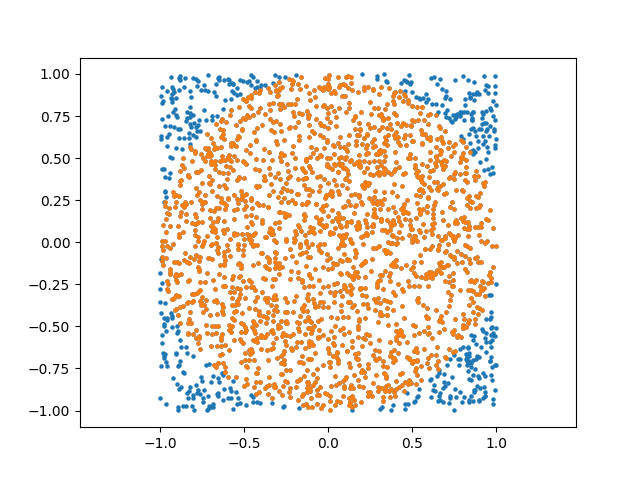

In [4]:
x_array = np.array(x_list)
y_array = np.array(y_list)

mask = dart_in_circle_check(x_array,y_array)

asdf = plt.scatter(x_array, y_array, s=5)
asdf = plt.scatter(x_array[mask],y_array[mask], s=5)

asdf = plt.axis("equal")
plt.show()

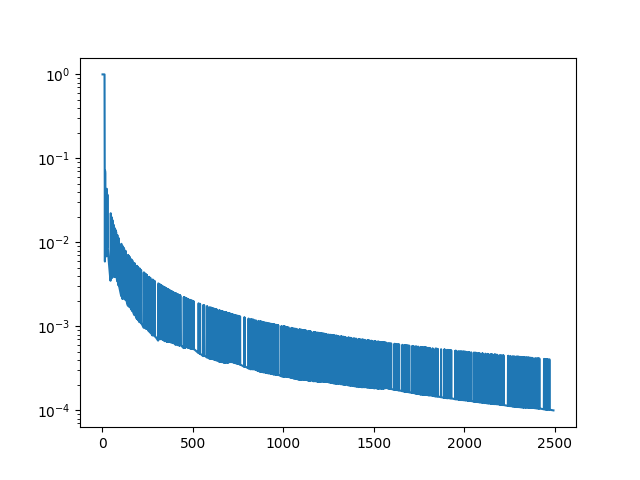

In [ ]:
plt.close("all")
plt.plot(i,abs(np.array(err)))
plt.yscale("log")
plt.show()